In [1]:
import numpy as np

In [2]:
D = np.load('data.npy')

In [50]:
D_sample = D[0:100]

Text(0.5, 0, 'time points')

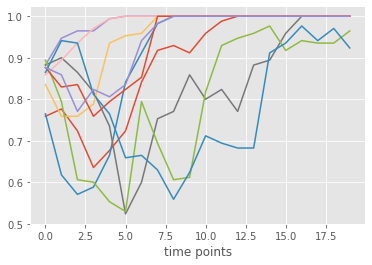

In [51]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.plot(np.array(D[19,:,:]))
plt.xlabel('time points')

In [57]:
np.shape(D[0])

(20, 10)

In [55]:
np.shape(D_sample)

(100, 20, 10)

In [161]:
nD = []
for i in D[20000]:
    nD.append(i[0])
    print(i[0])

0.711764705882353
0.7235294117647059
0.8411764705882353
0.8941176470588236
0.9529411764705882
0.9176470588235294
0.8411764705882353
0.7705882352941177
0.7294117647058823
0.6882352941176471
0.5764705882352941
0.5647058823529412
0.5058823529411764
0.5529411764705883
0.5941176470588235
0.5176470588235295
0.5764705882352941
0.5823529411764706
0.5588235294117647
0.5529411764705883


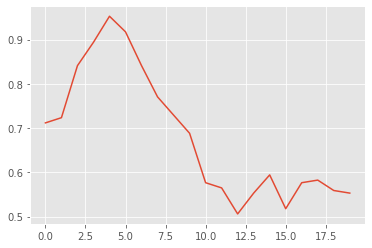

In [107]:
X = range(20)
plt.plot(X,nD)

In [89]:
np.shape(nD)

(20,)

In [177]:
from gtda.time_series import SingleTakensEmbedding
import plotly.graph_objects as go
from gtda.plotting import plot_point_cloud

embedding_dimension_nonperiodic = 3
embedding_time_delay_nonperiodic = 1
stride = 1

embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(nD)

plot_point_cloud(y_nonperiodic_embedded)

In [163]:
y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]

In [164]:
from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

nonperiodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for nonperiodic signal")
nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);

Persistence diagram for nonperiodic signal


In [153]:
nD = []
for i in D[10]:
    nD.append(i[0])
    print(i[0])

0.611764705882353
0.7529411764705882
0.6294117647058823
0.6647058823529411
0.6529411764705882
0.8117647058823529
0.6941176470588235
0.7058823529411765
0.6411764705882353
0.5294117647058824
0.5529411764705883
0.6411764705882353
0.7058823529411765
0.7529411764705882
0.6882352941176471
0.7470588235294118
0.711764705882353
0.7470588235294118
0.6882352941176471
0.7235294117647059


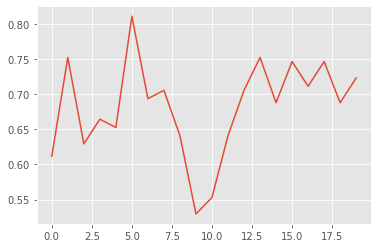

In [118]:
plt.plot(nD)

In [154]:

from gtda.time_series import SingleTakensEmbedding
import plotly.graph_objects as go
from gtda.plotting import plot_point_cloud

embedding_dimension_nonperiodic = 3
embedding_time_delay_nonperiodic = 1
stride = 1

embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(nD)

plot_point_cloud(y_nonperiodic_embedded)

In [155]:
y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]

In [156]:
from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

nonperiodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for nonperiodic signal")
nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded);

Persistence diagram for nonperiodic signal


In [165]:
# Import the gtda modules
from gtda.time_series import Resampler, SlidingWindow, takens_embedding_optimal_parameters, \
    TakensEmbedding, PermutationEntropy
from gtda.homology import WeakAlphaPersistence, VietorisRipsPersistence
from gtda.diagrams import Scaler, Filtering, PersistenceEntropy, BettiCurve, PairwiseDistance
from gtda.graphs import KNeighborsGraph, GraphGeodesicDistance

from gtda.pipeline import Pipeline

import numpy as np
from sklearn.metrics import pairwise_distances

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# gtda plotting functions
from gtda.plotting import plot_heatmap



In [166]:
homology_dimensions = (0, 1, 2)
WA = WeakAlphaPersistence(homology_dimensions=homology_dimensions)

X_diagrams = WA.fit_transform(y_nonperiodic_embedded)

In [167]:
WA.plot(X_diagrams, sample=0)

In [168]:
diagramScaler = Scaler()

X_scaled = diagramScaler.fit_transform(X_diagrams)

diagramScaler.plot(X_scaled, sample=0)

In [169]:
diagramFiltering = Filtering(epsilon=0.1, homology_dimensions=(1, 2))

X_filtered = diagramFiltering.fit_transform(X_scaled)

diagramFiltering.plot(X_filtered, sample=0)

In [170]:
PE = PersistenceEntropy()

X_persistence_entropy = PE.fit_transform(X_scaled)

X_persistence_entropy

array([[ 3.92574727,  0.5650339 , -1.        ]])

In [146]:
nD

[0.711764705882353,
 0.7235294117647059,
 0.8411764705882353,
 0.8941176470588236,
 0.9529411764705882,
 0.9176470588235294,
 0.8411764705882353,
 0.7705882352941177,
 0.7294117647058823,
 0.6882352941176471,
 0.5764705882352941,
 0.5647058823529412,
 0.5058823529411764,
 0.5529411764705883,
 0.5941176470588235,
 0.5176470588235295,
 0.5764705882352941,
 0.5823529411764706,
 0.5588235294117647,
 0.5529411764705883]

In [171]:
BC = BettiCurve()

X_betti_curves = BC.fit_transform(X_scaled)

BC.plot(X_betti_curves, sample=0)